In [141]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
sb.set() # set the default Seaborn style for graphics

In [151]:
#get values of cpi
cpi = pd.read_csv('M212882_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#set data series as index and convert to date time
cpi = cpi.rename(columns = {'Data Series':'Date'})
cpi.set_index('Date',inplace=True)
cpi = cpi.rename(columns=lambda x: x.strip())
#cpi.columns = pd.to_datetime(cpi.columns, format='%Y %b').dt.strftime('%Y-%m')
cpi.columns = pd.DatetimeIndex(cpi.columns).to_period('M')


cpi = cpi.T
cpi = cpi.rename(columns=lambda x: x.strip())
#cpi = cpi.sort_index()
cpi.tail()
#print(cpi.index.name)

Date,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Meat,Fish & Seafood,"Milk, Cheese & Eggs",Oils & Fats,Fruits,Vegetables,"Sugar, Preserves & Confectionery",Non-Alcoholic Beverages,Other Food,Food Serving Services,Restaurant Food,Fast Food,Hawker Food,Catered Food,Clothing & Footwear,Clothing,Other Articles & Related Services,Footwear,Housing & Utilities,Accommodation,Utilities & Other Fuels,Household Durables & Services,Household Durables,Household Services & Supplies,Health Care,Medicines & Health Products,Outpatient Services,Hospital Services,Health Insurance,Transport,Private Transport,Public Transport,Other Transport Services,Communication,Postage & Courier Services,Telecommunication Equipment,Telecommunication Services,Recreation & Culture,Recreational & Cultural Goods,Recreational & Cultural Services,"Newspapers, Books & Stationery",Holiday Expenses,Education,Tuition & Other Fees,Textbooks & Guides,Miscellaneous Goods & Services,Personal Care,Alcoholic Drinks & Tobacco,Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-Occupied Accommodation,All Items Less Accommodation
1961-05,24.246,21.253,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,53.843,na,na,na,26.728,na,na,32.338,na,na,18.604,na,na,na,na,20.538,na,na,na,89.155,na,na,na,49.124,na,na,na,na,14.874,na,na,18.822,na,na,na,na,na,na,na
1961-04,24.365,21.432,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,54.108,na,na,na,26.65,na,na,32.507,na,na,18.604,na,na,na,na,20.538,na,na,na,89.155,na,na,na,49.124,na,na,na,na,14.874,na,na,18.837,na,na,na,na,na,na,na
1961-03,24.543,21.743,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,54.123,na,na,na,26.553,na,na,32.214,na,na,18.604,na,na,na,na,20.538,na,na,na,89.155,na,na,na,49.124,na,na,na,na,14.874,na,na,18.837,na,na,na,na,na,na,na
1961-02,24.249,21.314,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,54.08,na,na,na,26.669,na,na,31.853,na,na,18.604,na,na,na,na,20.538,na,na,na,89.155,na,na,na,49.124,na,na,na,na,14.874,na,na,18.845,na,na,na,na,na,na,na
1961-01,24.253,21.412,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,54.08,na,na,na,26.553,na,na,31.896,na,na,18.604,na,na,na,na,20.538,na,na,na,89.155,na,na,na,49.124,na,na,na,na,14.874,na,na,18.841,na,na,na,na,na,na,na


In [193]:
#2022 Dec - 1961 Jan

grocery = cpi[['Food Excl Food Serving Services','Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food']].replace('na', np.nan)
grocery = grocery.apply(pd.to_numeric)
grocery = grocery.dropna()
#grocery = grocery.fillna(0)
#grocery = grocery.interpolate()
grocery.tail()
grocery.count()


Date
Food Excl Food Serving Services     277
Bread & Cereals                     277
Meat                                277
Fish & Seafood                      277
Milk, Cheese & Eggs                 277
Oils & Fats                         277
Fruits                              277
Vegetables                          277
Sugar, Preserves & Confectionery    277
Non-Alcoholic Beverages             277
Other Food                          277
dtype: int64

use inflation rate table to calcalute missing data

inflation rate data obtained from here https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=SG

In [194]:
#inflation = pd.read_csv('InflationRateSG.csv')
#inflation = inflation.set_index('Year')
#inflation.index = pd.to_datetime(inflation.index).strftime('%Y')#.to_period('Y')
#inflation.head()

In [195]:
#assume constant inflation rate, divide by 12
#inflation_monthly = inflation['Inflation rate'] / 12
#inflation_monthly.head()

In [196]:
births = pd.read_csv('M810051_clean.csv')

births = births.rename(columns = {'Data Series':'Date'})
births.set_index('Date',inplace=True)
births = births.rename(columns=lambda x: x.strip())
#births.columns = pd.to_datetime(births.columns, format='%Y %b')
births.columns = pd.DatetimeIndex(births.columns).to_period('M')

births = births.T
births = births.rename(columns=lambda x: x.strip())
births = births.sort_index()
births.head()
#print(births.keys())

Date,Total Live-Births By Ethnic Group,Malays,Chinese,Indians,Other Ethnic Groups,Total Male Live-Births By Ethnic Group,Malays,Chinese,Indians,Other Ethnic Groups,Total Female Live-Births By Ethnic Group,Malays,Chinese,Indians,Other Ethnic Groups
1960-01,4981,838,3589,467,87,2621,444,1888,240,49,2360,394,1701,227,38
1960-02,4596,836,3290,377,93,2430,434,1767,185,44,2166,402,1523,192,49
1960-03,4964,849,3639,384,92,2568,431,1883,206,48,2396,418,1756,178,44
1960-04,4904,843,3610,364,87,2516,450,1834,185,47,2388,393,1776,179,40
1960-05,5244,872,3868,392,112,2658,440,1958,196,64,2586,432,1910,196,48


<AxesSubplot:>

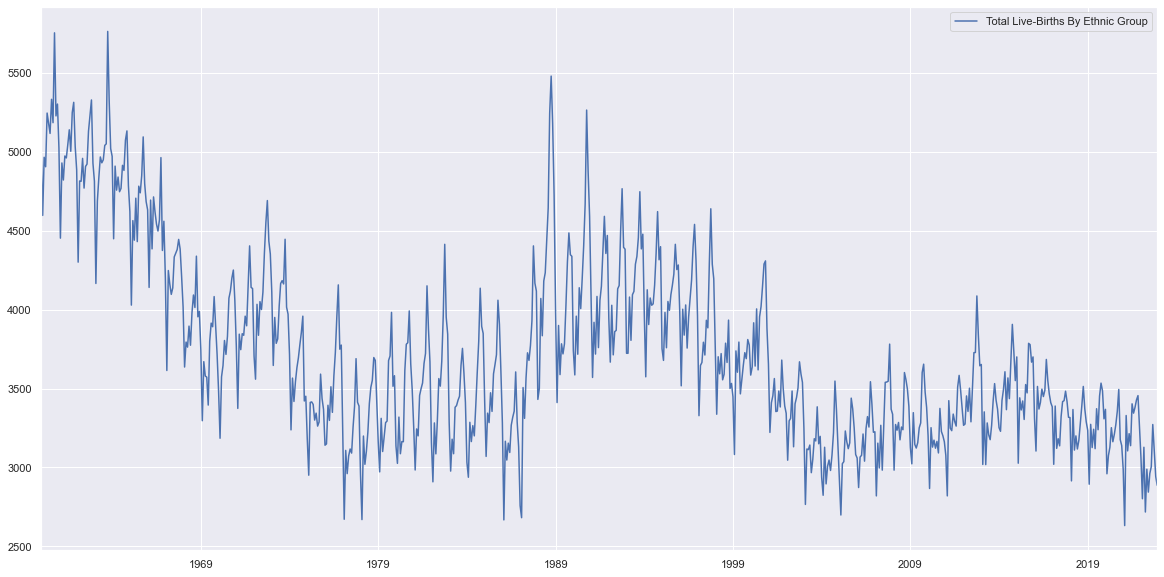

In [197]:
#2022 Dec - 1961 Jan

#remove before 1961 jan
babies = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
#babies = babies[(babies.index > "1960-12")]

babies.head()
babies = babies.astype('int64')
babies.plot(figsize=(20, 10))

<AxesSubplot:>

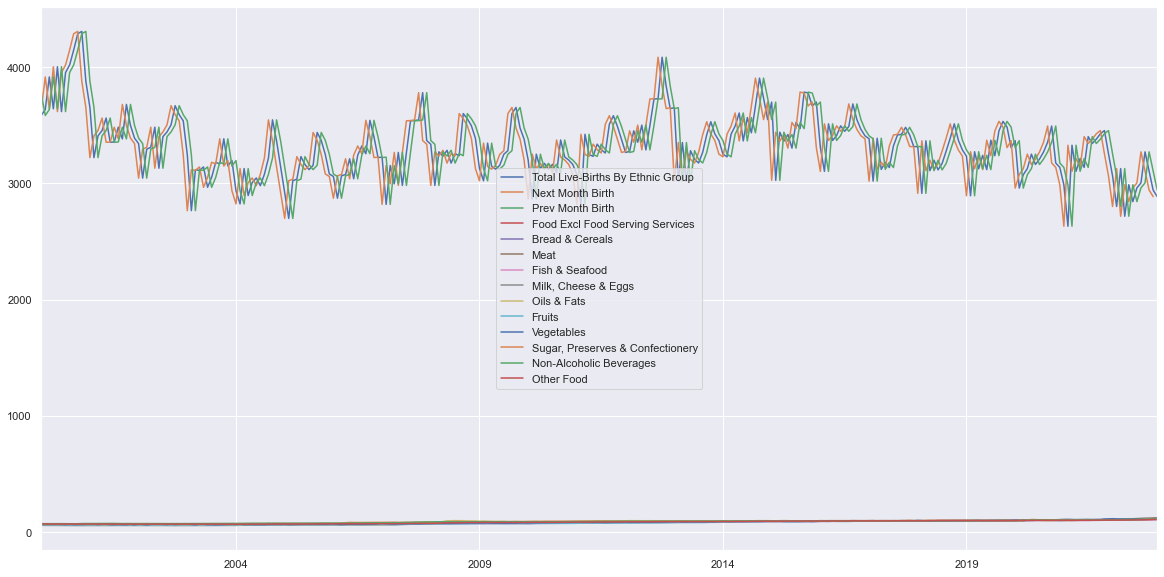

In [198]:
grocerybirths = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
grocerybirths['Next Month Birth'] = grocerybirths['Total Live-Births By Ethnic Group'].shift(-1)
grocerybirths['Prev Month Birth'] = grocerybirths['Total Live-Births By Ethnic Group'].shift(1)


groceryTotal = grocerybirths.join(grocery['Food Excl Food Serving Services'], how='inner')
bread = grocerybirths.join(grocery['Bread & Cereals'], how='inner')
meat = grocerybirths.join(grocery['Meat'], how='inner')
fish = grocerybirths.join(grocery['Fish & Seafood'], how='inner')
eggs = grocerybirths.join(grocery['Milk, Cheese & Eggs'], how='inner')
oil = grocerybirths.join(grocery['Oils & Fats'], how='inner')
fruit = grocerybirths.join(grocery['Fruits'], how='inner')
vegetable = grocerybirths.join(grocery['Vegetables'], how='inner')
sugar = grocerybirths.join(grocery['Sugar, Preserves & Confectionery'], how='inner')
alcohol = grocerybirths.join(grocery['Non-Alcoholic Beverages'], how='inner')
others = grocerybirths.join(grocery['Other Food'], how='inner')

groceryMerge = pd.concat([groceryTotal, bread, meat, fish, eggs, oil, fruit, vegetable, sugar, alcohol, others], axis=1, join='inner')
groceryMerge = groceryMerge.loc[:,~groceryMerge.columns.duplicated(keep='first')]
groceryMerge.plot(figsize=(20, 10))

In [199]:
groceryMerge.info()
groceryMerge.corr()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 276 entries, 2000-01 to 2022-12
Freq: M
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  276 non-null    int64  
 1   Next Month Birth                   275 non-null    float64
 2   Prev Month Birth                   276 non-null    float64
 3   Food Excl Food Serving Services    276 non-null    float64
 4   Bread & Cereals                    276 non-null    float64
 5   Meat                               276 non-null    float64
 6   Fish & Seafood                     276 non-null    float64
 7   Milk, Cheese & Eggs                276 non-null    float64
 8   Oils & Fats                        276 non-null    float64
 9   Fruits                             276 non-null    float64
 10  Vegetables                         276 non-null    float64
 11  Sugar, Preserves & Confectionery   276 

,Total Live-Births By Ethnic Group,Next Month Birth,Prev Month Birth,Food Excl Food Serving Services,Bread & Cereals,Meat,Fish & Seafood,"Milk, Cheese & Eggs",Oils & Fats,Fruits,Vegetables,"Sugar, Preserves & Confectionery",Non-Alcoholic Beverages,Other Food
Total Live-Births By Ethnic Group,1.000000,0.687026,0.688388,-0.104366,-0.079277,-0.147413,-0.092710,-0.089096,-0.046528,-0.106459,-0.121190,-0.134344,-0.123619,-0.083219
Next Month Birth,0.687026,1.000000,0.605930,-0.097258,-0.074316,-0.136906,-0.089829,-0.076597,-0.034491,-0.102500,-0.126464,-0.118933,-0.116329,-0.076417
Prev Month Birth,0.688388,0.605930,1.000000,-0.103423,-0.080199,-0.149039,-0.090622,-0.091978,-0.056537,-0.099742,-0.099190,-0.139083,-0.126542,-0.082931
Food Excl Food Serving Services,-0.104366,-0.097258,-0.103423,1.000000,0.990003,0.983341,0.984379,0.995411,0.942623,0.983808,0.985622,0.971012,0.987798,0.997049
Bread & Cereals,-0.079277,-0.074316,-0.080199,0.990003,1.000000,0.984692,0.957025,0.984933,0.974551,0.956085,0.961219,0.973276,0.984914,0.989716
Meat,-0.147413,-0.136906,-0.149039,0.983341,0.984692,1.000000,0.942039,0.977599,0.957477,0.942317,0.953849,0.981129,0.989003,0.974847
Fish & Seafood,-0.092710,-0.089829,-0.090622,0.984379,0.957025,0.942039,1.000000,0.980815,0.882567,0.992851,0.983439,0.930825,0.953334,0.984535
"Milk, Cheese & Eggs",-0.089096,-0.076597,-0.091978,0.995411,0.984933,0.977599,0.980815,1.000000,0.935807,0.980827,0.974588,0.958625,0.979614,0.993340
Oils & Fats,-0.046528,-0.034491,-0.056537,0.942623,0.974551,0.957477,0.882567,0.935807,1.000000,0.881106,0.899659,0.951953,0.959135,0.940765
Fruits,-0.106459,-0.102500,-0.099742,0.983808,0.956085,0.942317,0.992851,0.980827,0.881106,1.000000,0.983881,0.928442,0.955636,0.983060


# Random Forest

In [204]:
#groceryMerge = pd.concat([groceryTotal,bread,meat,fish,eggs,oil,fruit,vegetable], axis=1, join='inner')
#groceryMerge = groceryMerge.loc[:,~groceryMerge.columns.duplicated(keep='first')]

In [205]:
results = []

for i in range(250):
    seed = random.randint(0, 10000)
    # Step 1: Create binary target variable
    groceryMerge['Prediction'] = (groceryMerge['Total Live-Births By Ethnic Group'] > groceryMerge['Next Month Birth']).astype(int)

    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    x = groceryMerge[['Total Live-Births By Ethnic Group', 'Prev Month Birth', 'Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables']]
    #x = groceryMerge[['Total Live-Births By Ethnic Group', 'Prev Month Birth', 'Food Excl Food Serving Services', 'Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food']]

    # Step 2.2: Response
    y = groceryMerge['Prediction']

    # Step 3: Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    # Step 4: Create Random Forest Classifier object
    rf = RandomForestClassifier(n_estimators=100, max_depth=5)

    # Step 5: Fit model to training data
    rf.fit(x_train, y_train)

    # Step 6: Make predictions on test data
    y_pred = rf.predict(x_test)

    # Step 7: Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confuse = confusion_matrix(y_test, y_pred)

    results.append((seed, accuracy, precision, recall, f1, confuse))


# Sort results by F1 score in descending order
results.sort(key=lambda x: x[4], reverse=True)

In [206]:
results = results[:5]

for i in range(5):
    print('----------------------------------------------')
    print(f"Random state {results[i][0]}:")
    print(f'Accuracy  = {results[i][1]:.4f}')
    print(f'Precision = {results[i][2]:.4f}')
    print(f'Recall    = {results[i][3]:.4f}')
    print(f'F1 score  = {results[i][4]:.4f}')

print('----------------------------------------------')

----------------------------------------------
Random state 9555:
Accuracy  = 0.7679
Precision = 0.7941
Recall    = 0.8182
F1 score  = 0.8060
----------------------------------------------
Random state 3137:
Accuracy  = 0.7500
Precision = 0.7500
Recall    = 0.8438
F1 score  = 0.7941
----------------------------------------------
Random state 6127:
Accuracy  = 0.7321
Precision = 0.7647
Recall    = 0.7879
F1 score  = 0.7761
----------------------------------------------
Random state 8578:
Accuracy  = 0.7679
Precision = 0.6774
Recall    = 0.8750
F1 score  = 0.7636
----------------------------------------------
Random state 1505:
Accuracy  = 0.7143
Precision = 0.6944
Recall    = 0.8333
F1 score  = 0.7576
----------------------------------------------


In [207]:
print(f'Average Accuracy:  {sum([i[1] for i in results])/5:.4f}')
print(f'Average Precision: {sum([i[2] for i in results])/5:.4f}')
print(f'Average Recall:    {sum([i[3] for i in results])/5:.4f}')
print(f'Average F1 Score:  {sum([i[4] for i in results])/5:.4f}')

Average Accuracy:  0.7464
Average Precision: 0.7361
Average Recall:    0.8316
Average F1 Score:  0.7795
